In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE = [224, 224]

train_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/train'
valid_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test'

In [5]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

I0000 00:00:1764704993.609031      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1764704993.609663      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [7]:
# useful for getting number of classes
folders = glob('/kaggle/input/vegetable-image-dataset/Vegetable Images/test/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 15)             │       376,335 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,091,023 (57.57 MB)

 Trainable params: 376,335 (1.44 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Setup Data Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

# 2. Load Data from Directories
training_set = train_datagen.flow_from_directory(
    '/kaggle/input/vegetable-image-dataset/Vegetable Images/train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

test_set = test_datagen.flow_from_directory(
    '/kaggle/input/vegetable-image-dataset/Vegetable Images/test',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

# 3. Modern Training Syntax (Replacing the commented out fit_generator)
# Note: Ensure you have compiled your 'model' before running this!
# r = model.fit(
#     training_set,
#     validation_data=test_set,
#     epochs=5,
#     steps_per_epoch=len(training_set),
#     validation_steps=len(test_set)
# )

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [16]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


I0000 00:00:1764705192.872338     114 service.cc:148] XLA service 0x7f31d4004340 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764705192.873398     114 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1764705192.873418     114 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1764705193.209045     114 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/469 ━━━━━━━━━━━━━━━━━━━━ 1:44:44 13s/step - accuracy: 0.0938 - loss: 2.9984

I0000 00:00:1764705204.753839     114 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 266s 541ms/step - accuracy: 0.8131 - loss: 0.6516 - val_accuracy: 0.9830 - val_loss: 0.0645
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 194s 414ms/step - accuracy: 0.9781 - loss: 0.0753 - val_accuracy: 0.9820 - val_loss: 0.0596
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 193s 411ms/step - accuracy: 0.9869 - loss: 0.0429 - val_accuracy: 0.9883 - val_loss: 0.0394
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 189s 403ms/step - accuracy: 0.9863 - loss: 0.0455 - val_accuracy: 0.9943 - val_loss: 0.0264
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 189s 402ms/step - accuracy: 0.9867 - loss: 0.0419 - val_accuracy: 0.9903 - val_loss: 0.0391


# GRAPHS

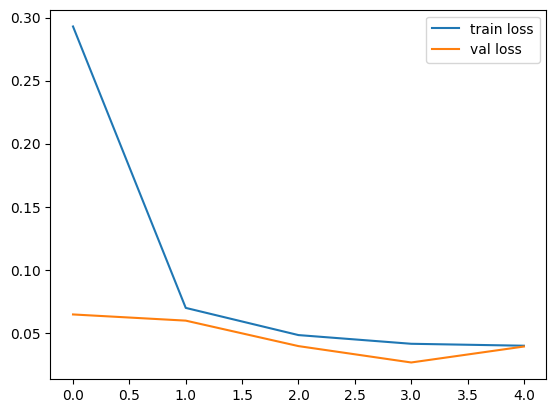

<Figure size 640x480 with 0 Axes>

In [19]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

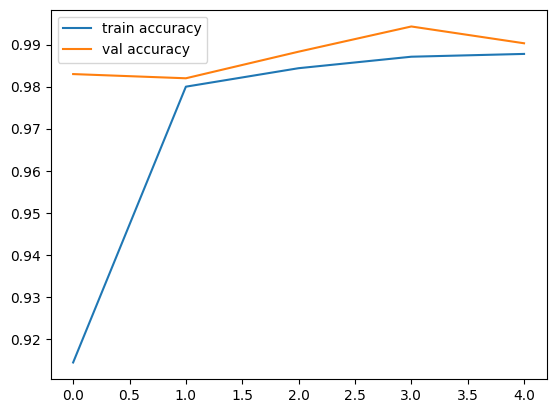

In [21]:
# accuracies
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.savefig('AccVal_acc.png') 
plt.show()

In [22]:
import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model.h5')

#  INFRENCING

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


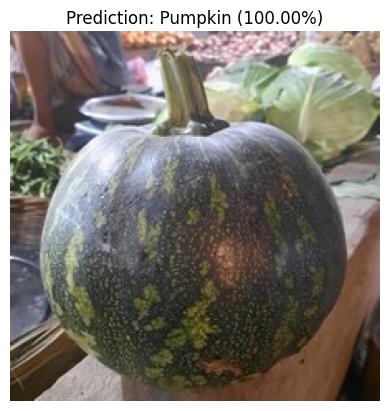

Model thinks this is a: Pumpkin


In [25]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# 1. Define the class names manually or get them from the generator
# Based on your dataset structure, these should be sorted alphabetically
class_names = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 
               'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 
               'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# 2. Pick an image to test
img_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Pumpkin/1001.jpg'

# 3. Load and Preprocess
# Target size must match training (224, 224)
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)

# SCALING: IMPORTANT! 
# Since you trained with rescale=1./255, we must divide by 255 here too.
x = x / 255.0

# Expand dimensions to fit model input (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)

# 4. Predict
preds = model.predict(x)
pred_class_index = np.argmax(preds, axis=1)[0]
pred_label = class_names[pred_class_index]
confidence = np.max(preds)

# 5. Show Result
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {pred_label} ({confidence*100:.2f}%)")
plt.show()

print(f"Model thinks this is a: {pred_label}")